<a href="https://colab.research.google.com/github/EUtrilla2002/ProyectoDatos/blob/main/0-EDA_analisis_base_datos_EUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis de datos

In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Datos/archive.zip"  # Reemplaza con el nombre de tu archivo ZIP
extract_path = "/content/drive/MyDrive/Datos/contenido_zip"  # Carpeta donde se extraerán los archivos

# Crear carpeta si no existe
os.makedirs(extract_path, exist_ok=True)

# Descomprimir el ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Descompresión completa.")

Descompresión completa.


## Bases de datos

In [ ]:
import pandas as pd

# Cargar los datasets (pueden estar en CSV, Excel, etc.)
df1 = pd.read_csv("/content/drive/MyDrive/Datos/contenido_zip/Books_rating.csv")  # Primera base de datos
#df2 = pd.read_csv("/content/drive/MyDrive/Datos/contenido_zip/books_data.csv")  # Segunda base de datos


In [ ]:

# Ver los primeros registros (opcional)
print(df1.columns)

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')


Elegimos aquella base de datos que contenga las reviews y su calificación (es decir, la base de datos 1)

## Eliminación de columnas

Echamos un vistazo a la situación de nuestro dataset para ver qué datos pueden sernos útiles

In [ ]:
# Contar NaN en cada columna
nan_counts = df1.isna().sum()

# Mostrar resultado
print(nan_counts)

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64


Sabiendo nuestro objetivo y viendo los datos faltantes, sacamos las siguientes conclusiones:


*   Eliminamos información relativa al libro (Título, id y precio) ya que no es relevante en este caso para el modelo NLP
*   Eliminamos de la información relativa a la review el tiempo (que en este caso no es relevante) y los resúmenes (ya que puede ser información reiterativa de las reviews). eliminamos helpfullness ya que no sigue la misma escala en todos los casos

*  Eliminamos información relativa al cliente que hizo la review (User_id, profileName) para anonimizar y generalizar nuestro estudio.

*  Eliminamos aquellas entradas que no tengan review/text (las 8 mostradas anteriormente)




In [ ]:
df_final = df1.drop(columns=["Id","Title","Price","User_id","profileName","review/time","review/helpfulness","review/summary"])
df_final = df_final.dropna()


df_final.head()

,review/score,review/text
0,4.0,This is only for Julie Strain fans. It's a col...
1,5.0,I don't care much for Dr. Seuss but after read...
2,5.0,"If people become the books they read and if ""t..."
3,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,4.0,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
# Contar NaN en cada columna
nan_counts = df_final.isna().sum()

# Mostrar resultado
print(nan_counts)

review/score    0
review/text     0
dtype: int64


In [ ]:
df_final.to_csv("/content/drive/MyDrive/Datos/contenido_zip/base_limpia.csv", index=False)

## Análisis de reviews

Para saber cómo son las reviews, exploramos 5 descripciones de cada texto manualmente

In [ ]:
# Reviews de 1 estrella
# Filtrar reviews con score 1.0
reviews_1_estrella = df_final[df_final["review/score"] == 1.0]

# Seleccionar 5 ejemplos aleatorios
ejemplos = reviews_1_estrella.sample(n=5, random_state=42)

# Imprimir los textos completos
for i, texto in enumerate(ejemplos["review/text"], 1):
    print(f"\n--- Review {i} ---\n{texto}\n")





--- Review 1 ---
I thought that this book was not useful at all and I really regret buying it. I thought the names were original but maybe a bit too original. I will be looking out for a similar book, but when buying one next time I will take a bit more care.


--- Review 2 ---
This book was slow and it was difficult to get myself to finish reading it.


--- Review 3 ---
Our Sunday School used this book for a quarter, and I could hardly wait until we were done. Liz's humor got to me -- one woman in our class said it is hard to read some of the rough, crude things. I love humor, BUT.............her writing turns me off completely. They had the video to go with the book yesterday and she is just too silly for a mature Christian!


--- Review 4 ---
Any single aspect of Precious' life is believable, and many multiple aspects such as illiteracy and abuse. But when combined with all the other societal maladies Precious embodies, the book descends into crass tearjerker territory and becomes 

In [ ]:
# Reviews de 2 estrella
# Filtrar reviews con score 1.0
reviews_2_estrella = df_final[df_final["review/score"] == 2.0]

# Seleccionar 5 ejemplos aleatorios
ejemplos = reviews_2_estrella.sample(n=5, random_state=42)

# Imprimir los textos completos
for i, texto in enumerate(ejemplos["review/text"], 1):
    print(f"\n--- Review {i} ---\n{texto}\n")



--- Review 1 ---
I have to agree with most of the other reviews. As thick as this book is, the plot goes basically nowhere. Right up until the very last page, Mat is the only character who actually *does* anything, and it's not even all that much. In the meantime, we have to agonize over name after name after name, trying to remember the significance of minor characters introduced 2 or 3 or 4 books ago. Or we try to trudge through paragraph after paragraph of superfluous descriptions, more than in any of the previous books.I thought that the monumental events at the end of book 9 signified exciting changes, and yet nothing changes. Though the first half of this book occurs during book 9's big event, even after book 10 catches up with that point nothing comes of it. Instead we have Rand complaining about not having time to handle serious issues, all while he sits around doing nothing! We have Perrin fuming and buying grain! We have Elayne plotting!In the previous 4 or so books, I felt 

In [ ]:
# Reviews de 3 estrella
# Filtrar reviews con score 3.0
reviews_3_estrella = df_final[df_final["review/score"] == 3.0]

# Seleccionar 5 ejemplos aleatorios
ejemplos = reviews_3_estrella.sample(n=5, random_state=42)

# Imprimir los textos completos
for i, texto in enumerate(ejemplos["review/text"], 1):
    print(f"\n--- Review {i} ---\n{texto}\n")


--- Review 1 ---
Once again the fact that I bought this second hand should have been my warning.I do not like thee Harry Angstrom, AKA Rabbit. You're a long legged rabbit of a man. Former would be basketball hero and as much a cause of your muddled life as its victim. Much more the cause...I feel about this book pretty much the same as I feel about Billy Bud. Sledged hammered by the obvious and heavy-handed use of symbolism, themes, foreshadowing and the rest of the "how to read a novel-isms", that justify so many English classes.Our hero... Nope cant stomach that word for this Harry....Our protagonist is leaving his youth with is future behind him. His life a muddle -we will read that word a lot - and not happy with wife, child, job, neighborhood and what ever.Rabbit has animal appetites, and rabbit sex. He can run, often in circles. Women find him cute. He is easily scared into running some more and he is rather indifferent to favors done for him. Do we need a bushy tail and a wiggl

In [ ]:
# Reviews de 4 estrella
# Filtrar reviews con score 4.0
reviews_4_estrella = df_final[df_final["review/score"] == 4.0]

# Seleccionar 5 ejemplos aleatorios
ejemplos = reviews_4_estrella.sample(n=5, random_state=42)

# Imprimir los textos completos
for i, texto in enumerate(ejemplos["review/text"], 1):
    print(f"\n--- Review {i} ---\n{texto}\n")


--- Review 1 ---
This is the original murder mystery novel. It predates other mystery/crime giants such as Agatha Chrisite and Dorothy Sayers. I can understand that for someone used to today's style of writing, this book may seem a bit old fashioned, but it pays to remember that it was written in the late 1800s and is one of the reasons why this genre of novels is so popular today. I enjoyed it immensely and would recommend it to all murder mystery fans.


--- Review 2 ---
Being able to do this program from the privacy of my own home or office is a dream! My initial investment in the equipment needed was less than $200. Health clubs are too crowded and expensive for my taste, so this program, dare I say.....fits me to a tee!


--- Review 3 ---
Main Idea:The seas and oceans around the world hold many truly wondrous things to us if you look for them.Summary:In 1866, a naturalist called M. Arronax departs with his friend and servant Conseil on a journey to kill a "narwhal" that has been 

In [ ]:
# Reviews de 5 estrella
# Filtrar reviews con score 5.0
reviews_5_estrella = df_final[df_final["review/score"] == 5.0]

# Seleccionar 5 ejemplos aleatorios
ejemplos = reviews_5_estrella.sample(n=5, random_state=42)

# Imprimir los textos completos
for i, texto in enumerate(ejemplos["review/text"], 1):
    print(f"\n--- Review {i} ---\n{texto}\n")


--- Review 1 ---
A Study in Scarlet is one of four novel length entries in the Sherlockian canon (which is mainly comprised of fifty-six short stories).It is also the very first Sherlock Holmes effort by Arthur Conan Doyle (1887). And like The Valley of Fear (also full-length), A Study in Scarlet is broken into two parts: one involving Holmes, Watson, and the rest of Victorian London; the other a flashback to America. These story-within-a-story sequences are long and have often been cited as a turn-off for those expecting Holmes on every page. In particular, the Mormon episode in A Study in Scarlet, while ultimately vital to the story, is a sharp departure from the apparent plot. On the other hand, the Pennsylvania coal mining vignette in The Valley of Fear could easily stand on its own as a hard-boiled detective yarn.Still, A Study in Scarlet is essential reading and paves the way to a better understanding of the relationship between Holmes and Watson. And of course it's also our int

## Balanceo de datos

In [4]:
# Contar ocurrencias de los valores en una columna
import pandas as pd
import matplotlib.pyplot as plt
df_final = pd.read_csv("/content/drive/MyDrive/Datos/contenido_zip/base_limpia.csv")
conteo_valores = df_final["review/score"].value_counts()

# Mostrar el resultado
print(conteo_valores)

review/score
5.0    1807335
4.0     585616
3.0     254295
1.0     201688
2.0     151058
Name: count, dtype: int64


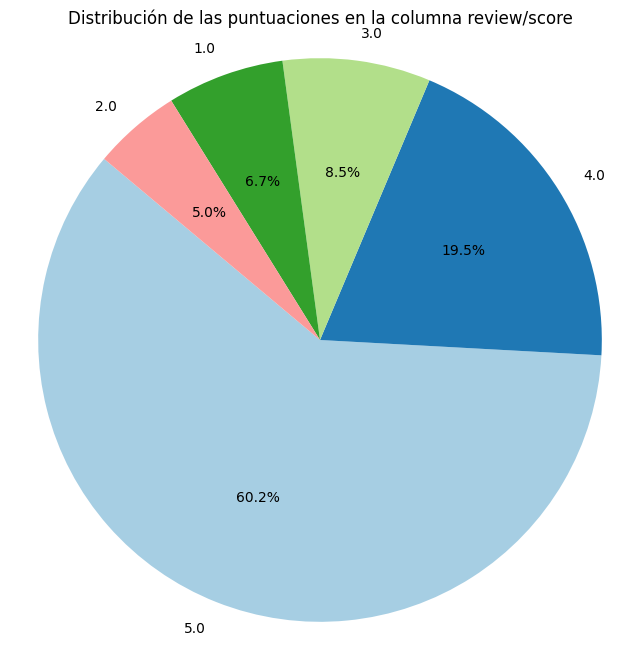

In [6]:
# Crear gráfico de barras
plt.figure(figsize=(8, 8))
plt.pie(conteo_valores, labels=conteo_valores.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Título del gráfico
plt.title('Distribución de las puntuaciones en la columna review/score')

# Mostrar el gráfico
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

La base de datos presenta un fuerte desbalance en la distribución de clases: más del 60% de las reseñas tienen una puntuación de 5 estrellas. Este desequilibrio puede afectar negativamente al rendimiento de los modelos predictivos, ya que tienden a favorecer la clase mayoritaria.

*  Inicialmente, podríamos considerar agrupar las puntuaciones en dos categorías: reviews positivas (puntuaciones 4 y 5) y reviews negativas (puntuaciones de 1 a 3) según lo visto en el análisis manual de las reviews. Sin embargo, esta estrategia por sí sola no resuelve el problema, ya que las reviews positivas siguen representando una gran mayoría frente al resto.

*  Por ello, optamos por aplicar una técnica de resampling, concretamente undersampling, que consiste en reducir el número de muestras de la clase mayoritaria. De este modo, conseguimos un conjunto de datos más equilibrado y adecuado para el entrenamiento de modelos de clasificación.

In [9]:

import pandas as pd

# Separar las clases originales
df_5 = df_final[df_final["review/score"] == 5.0]
df_4 = df_final[df_final["review/score"] == 4.0]
df_3 = df_final[df_final["review/score"] == 3.0]
df_2 = df_final[df_final["review/score"] == 2.0]
df_1 = df_final[df_final["review/score"] == 1.0]

# Agrupar las clases en 3 categorías
df_positivo = pd.concat([df_5, df_4])  # 5 y 4 estrellas
df_neutral = df_3  # 3 estrellas
df_negativo = pd.concat([df_2, df_1])  # 2 y 1 estrellas

# Tamaño objetivo: el tamaño de la clase más pequeña (en este caso, neutral)
tamaño_minimo = min(len(df_positivo), len(df_neutral), len(df_negativo))
print(f"Tamaño mínimo de las clases: {tamaño_minimo}")

# Hacer undersampling de las clases para balancearlas
df_positivo_under = df_positivo.sample(n=tamaño_minimo, random_state=42)
df_neutral_under = df_neutral.sample(n=tamaño_minimo, random_state=42)
df_negativo_under = df_negativo.sample(n=tamaño_minimo, random_state=42)

# Asignar etiquetas de categoría
df_positivo_under["categoria"] = "positivo"
df_neutral_under["categoria"] = "neutral"
df_negativo_under["categoria"] = "negativo"

# Unir todo en un nuevo dataset balanceado
df_balanceado = pd.concat([df_positivo_under, df_neutral_under, df_negativo_under])

# Mezclar (shuffle)
df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar las categorías
print(df_balanceado["categoria"].value_counts())




Tamaño mínimo de las clases: 254295
categoria
neutral     254295
negativo    254295
positivo    254295
Name: count, dtype: int64


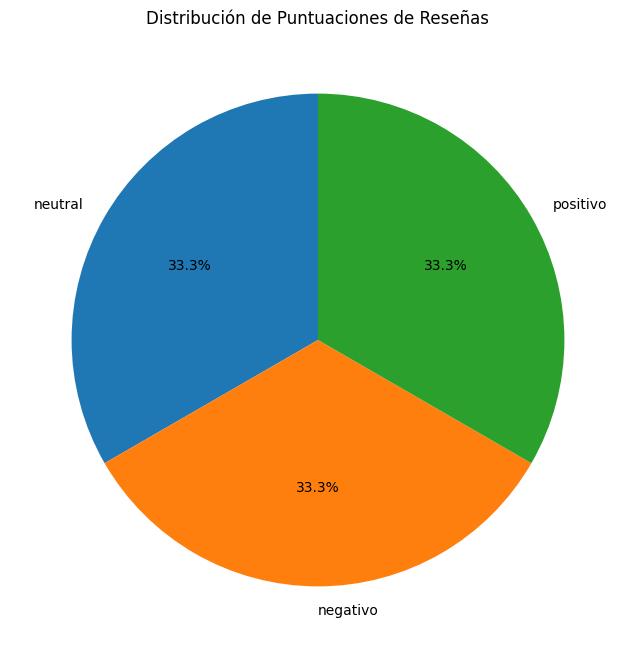

In [11]:
conteo_valores = df_balanceado["categoria"].value_counts()
import pandas as pd
import matplotlib.pyplot as plt
# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(conteo_valores, labels=conteo_valores.index, autopct='%1.1f%%', startangle=90)

# Añadir título
plt.title('Distribución de Puntuaciones de Reseñas')

# Mostrar el gráfico
plt.show()